In [1]:
import os, sys
import ROOT as rt
from ROOT import TH1F,TFile,TTree,TCanvas, TProfile, TNtuple, gErrorIgnoreLevel, kInfo, kWarning, TLegend, TLine, TString
from tqdm import tqdm
import CMS_lumi, tdrstyle
import array
tqdm_disable = False
rt.gErrorIgnoreLevel = kWarning;

Welcome to JupyROOT 6.26/04


In [2]:
#set the tdr style
tdrstyle.setTDRStyle()

#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = ""#"Preliminary"
CMS_lumi.lumi_sqrtS = "31.95 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string

iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.12
iPeriod = 0

In [3]:
H_ref = 600; 
W_ref = 800; 
W = W_ref
H  = H_ref

# references for T, B, L, R
T = 0.08*H_ref
B = 0.12*H_ref 
L = 0.12*W_ref
R = 0.04*W_ref

In [4]:
F1 = TFile("trees/MaxDigis_tree_Data.root")
#F2 = TFile("trees/MaxDigis_tree_Neutrino_gun.root")
signal = ["HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-100000mm",
          "HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-10000mm",
          "HTo2LongLivedTo4b_MH-125_MFF-12_CTau-9000mm",
          "HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm",
          "HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm",
          "HTo2LongLivedTo4b_MH-125_MFF-25_CTau-1500mm",
          "HTo2LongLivedTo4b_MH-125_MFF-50_CTau-30000mm",
          "HTo2LongLivedTo4b_MH-125_MFF-50_CTau-3000mm",
          "HTo2LongLivedTo4b_MH-250_MFF-120_CTau-10000mm",
          "HTo2LongLivedTo4b_MH-250_MFF-120_CTau-1000mm",
          "HTo2LongLivedTo4b_MH-250_MFF-120_CTau-500mm",
          "HTo2LongLivedTo4b_MH-250_MFF-60_CTau-10000mm",
          "HTo2LongLivedTo4b_MH-250_MFF-60_CTau-500mm",
          "HTo2LongLivedTo4b_MH-350_MFF-160_CTau-10000mm",
          "HTo2LongLivedTo4b_MH-350_MFF-160_CTau-1000mm",
          "HTo2LongLivedTo4b_MH-350_MFF-160_CTau-500mm",
          "HTo2LongLivedTo4b_MH-350_MFF-80_CTau-10000mm",
          "HTo2LongLivedTo4b_MH-350_MFF-80_CTau-1000mm",
          "HTo2LongLivedTo4b_MH-350_MFF-80_CTau-500mm",
          "HTo2LongLivedTo4q_MH_125_MFF_1_CTau_10000mm",
          "HTo2LongLivedTo4q_MH_125_MFF_1_CTau_5000mm",
         ]

thresholds = [98, 56, 30, 49, 42, 49, 35, 42, 31, 104, 92, 32, 133, 83, 130, 74, 127, 88]
titles = ['nComp_ME11','nComp_ME12','nComp_ME13','nComp_ME21','nComp_ME22','nComp_ME31','nComp_ME32','nComp_ME41','nComp_ME42',
          'nWire_ME11','nWire_ME12','nWire_ME13','nWire_ME21','nWire_ME22','nWire_ME31','nWire_ME32','nWire_ME41','nWire_ME42']

In [4]:
F1 = TFile("trees/MaxDigis_tree_Data.root")
#F2 = TFile("trees/MaxDigis_tree_Neutrino_gun.root")
signal = ["HTo2LongLivedTo4b_MH_125_MFF_12_CTau_9000mm",
         ]

thresholds = [98, 56, 30, 49, 42, 49, 35, 42, 31, 104, 92, 32, 133, 83, 130, 74, 127, 88]
titles = ['nComp_ME11','nComp_ME12','nComp_ME13','nComp_ME21','nComp_ME22','nComp_ME31','nComp_ME32','nComp_ME41','nComp_ME42',
          'nWire_ME11','nWire_ME12','nWire_ME13','nWire_ME21','nWire_ME22','nWire_ME31','nWire_ME32','nWire_ME41','nWire_ME42']

In [5]:
labels = []
for f in range(len(signal)):
    siggy = signal[f].replace("-","_")
    splits = siggy.split("_")
    label = "m_{H} = " + splits[2] + " GeV, m_{s} = " + splits[4] + " GeV, c#tau_{s} = " + splits[6]
    splits2 = label.split("mm")
    label = splits2[0] + " mm"
    labels.append(label)
    
#print labels

In [6]:
comp1 = F1.Get("comparator")
wire1 = F1.Get("wire")

hists_1=[]
Ev_max_nComp_ME11_1 = TH1F("Ev_max_nComp_ME11_1","Max nComp per Event in a Single Chamber in ME1/1", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME11_1)
Ev_max_nComp_ME12_1 = TH1F("Ev_max_nComp_ME12_1","Max nComp per Event in a Single Chamber in ME1/2", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME12_1)
Ev_max_nComp_ME13_1 = TH1F("Ev_max_nComp_ME13_1","Max nComp per Event in a Single Chamber in ME1/3", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME13_1)
Ev_max_nComp_ME21_1 = TH1F("Ev_max_nComp_ME21_1","Max nComp per Event in a Single Chamber in ME2/1", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME21_1)
Ev_max_nComp_ME22_1 = TH1F("Ev_max_nComp_ME22_1","Max nComp per Event in a Single Chamber in ME2/2", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME22_1)
Ev_max_nComp_ME31_1 = TH1F("Ev_max_nComp_ME31_1","Max nComp per Event in a Single Chamber in ME3/1", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME31_1)
Ev_max_nComp_ME32_1 = TH1F("Ev_max_nComp_ME32_1","Max nComp per Event in a Single Chamber in ME3/2", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME32_1)
Ev_max_nComp_ME41_1 = TH1F("Ev_max_nComp_ME41_1","Max nComp per Event in a Single Chamber in ME4/1", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME41_1)
Ev_max_nComp_ME42_1 = TH1F("Ev_max_nComp_ME42_1","Max nComp per Event in a Single Chamber in ME4/2", 150, -.5, 149.5); hists_1.append(Ev_max_nComp_ME42_1)

Ev_max_nWire_ME11_1 = TH1F("Ev_max_nWire_ME11_1","Max nWire per Event in a Single Chamber in ME1/1", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME11_1)
Ev_max_nWire_ME12_1 = TH1F("Ev_max_nWire_ME12_1","Max nWire per Event in a Single Chamber in ME1/2", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME12_1)
Ev_max_nWire_ME13_1 = TH1F("Ev_max_nWire_ME13_1","Max nWire per Event in a Single Chamber in ME1/3", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME13_1)
Ev_max_nWire_ME21_1 = TH1F("Ev_max_nWire_ME21_1","Max nWire per Event in a Single Chamber in ME2/1", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME21_1)
Ev_max_nWire_ME22_1 = TH1F("Ev_max_nWire_ME22_1","Max nWire per Event in a Single Chamber in ME2/2", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME22_1)
Ev_max_nWire_ME31_1 = TH1F("Ev_max_nWire_ME31_1","Max nWire per Event in a Single Chamber in ME3/1", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME31_1)
Ev_max_nWire_ME32_1 = TH1F("Ev_max_nWire_ME32_1","Max nWire per Event in a Single Chamber in ME3/2", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME32_1)
Ev_max_nWire_ME41_1 = TH1F("Ev_max_nWire_ME41_1","Max nWire per Event in a Single Chamber in ME4/1", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME41_1)
Ev_max_nWire_ME42_1 = TH1F("Ev_max_nWire_ME42_1","Max nWire per Event in a Single Chamber in ME4/2", 150, -.5, 149.5); hists_1.append(Ev_max_nWire_ME42_1)

for i in tqdm(range(0, comp1.GetEntries()),disable=tqdm_disable):
    comp1.GetEntry(i)

    Ev_max_nComp_ME11_1.Fill(comp1.Ev_max_nComp_ME11)
    Ev_max_nComp_ME12_1.Fill(comp1.Ev_max_nComp_ME12)
    Ev_max_nComp_ME13_1.Fill(comp1.Ev_max_nComp_ME13)
    Ev_max_nComp_ME21_1.Fill(comp1.Ev_max_nComp_ME21)
    Ev_max_nComp_ME22_1.Fill(comp1.Ev_max_nComp_ME22)
    Ev_max_nComp_ME31_1.Fill(comp1.Ev_max_nComp_ME31)
    Ev_max_nComp_ME32_1.Fill(comp1.Ev_max_nComp_ME32)
    Ev_max_nComp_ME41_1.Fill(comp1.Ev_max_nComp_ME41)
    Ev_max_nComp_ME42_1.Fill(comp1.Ev_max_nComp_ME42)

for i in tqdm(range(0, wire1.GetEntries()),disable=tqdm_disable):
    wire1.GetEntry(i)

    Ev_max_nWire_ME11_1.Fill(wire1.Ev_max_nWire_ME11)
    Ev_max_nWire_ME12_1.Fill(wire1.Ev_max_nWire_ME12)
    Ev_max_nWire_ME13_1.Fill(wire1.Ev_max_nWire_ME13)
    Ev_max_nWire_ME21_1.Fill(wire1.Ev_max_nWire_ME21)
    Ev_max_nWire_ME22_1.Fill(wire1.Ev_max_nWire_ME22)
    Ev_max_nWire_ME31_1.Fill(wire1.Ev_max_nWire_ME31)
    Ev_max_nWire_ME32_1.Fill(wire1.Ev_max_nWire_ME32)
    Ev_max_nWire_ME41_1.Fill(wire1.Ev_max_nWire_ME41)
    Ev_max_nWire_ME42_1.Fill(wire1.Ev_max_nWire_ME42)
    

100%|██████████| 43047/43047 [00:02<00:00, 16427.28it/s]


In [9]:
for f in tqdm(range(len(signal))):
    F2 = TFile("trees/MaxDigis_tree_"+signal[f]+"_TuneCP5_14TeV_pythia8.root")
    outfolder = "compplots/"+signal[f]+"/"
    outfolder = outfolder.replace("-","_")
    #out1 = outfile + "("
    #out2 = outfile + ")"
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)

    comp2 = F2.Get("comparator")
    wire2 = F2.Get("wire")

    hists_2=[]
    Ev_max_nComp_ME11_2 = TH1F("Ev_max_nComp_ME11_2","Max nComp per Event in a Single Chamber in ME1/1", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME11_2)
    Ev_max_nComp_ME12_2 = TH1F("Ev_max_nComp_ME12_2","Max nComp per Event in a Single Chamber in ME1/2", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME12_2)
    Ev_max_nComp_ME13_2 = TH1F("Ev_max_nComp_ME13_2","Max nComp per Event in a Single Chamber in ME1/3", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME13_2)
    Ev_max_nComp_ME21_2 = TH1F("Ev_max_nComp_ME21_2","Max nComp per Event in a Single Chamber in ME2/1", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME21_2)
    Ev_max_nComp_ME22_2 = TH1F("Ev_max_nComp_ME22_2","Max nComp per Event in a Single Chamber in ME2/2", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME22_2)
    Ev_max_nComp_ME31_2 = TH1F("Ev_max_nComp_ME31_2","Max nComp per Event in a Single Chamber in ME3/1", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME31_2)
    Ev_max_nComp_ME32_2 = TH1F("Ev_max_nComp_ME32_2","Max nComp per Event in a Single Chamber in ME3/2", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME32_2)
    Ev_max_nComp_ME41_2 = TH1F("Ev_max_nComp_ME41_2","Max nComp per Event in a Single Chamber in ME4/1", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME41_2)
    Ev_max_nComp_ME42_2 = TH1F("Ev_max_nComp_ME42_2","Max nComp per Event in a Single Chamber in ME4/2", 150, -.5, 149.5); hists_2.append(Ev_max_nComp_ME42_2)

    Ev_max_nWire_ME11_2 = TH1F("Ev_max_nWire_ME11_2","Max nWire per Event in a Single Chamber in ME1/1", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME11_2)
    Ev_max_nWire_ME12_2 = TH1F("Ev_max_nWire_ME12_2","Max nWire per Event in a Single Chamber in ME1/2", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME12_2)
    Ev_max_nWire_ME13_2 = TH1F("Ev_max_nWire_ME13_2","Max nWire per Event in a Single Chamber in ME1/3", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME13_2)
    Ev_max_nWire_ME21_2 = TH1F("Ev_max_nWire_ME21_2","Max nWire per Event in a Single Chamber in ME2/1", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME21_2)
    Ev_max_nWire_ME22_2 = TH1F("Ev_max_nWire_ME22_2","Max nWire per Event in a Single Chamber in ME2/2", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME22_2)
    Ev_max_nWire_ME31_2 = TH1F("Ev_max_nWire_ME31_2","Max nWire per Event in a Single Chamber in ME3/1", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME31_2)
    Ev_max_nWire_ME32_2 = TH1F("Ev_max_nWire_ME32_2","Max nWire per Event in a Single Chamber in ME3/2", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME32_2)
    Ev_max_nWire_ME41_2 = TH1F("Ev_max_nWire_ME41_2","Max nWire per Event in a Single Chamber in ME4/1", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME41_2)
    Ev_max_nWire_ME42_2 = TH1F("Ev_max_nWire_ME42_2","Max nWire per Event in a Single Chamber in ME4/2", 150, -.5, 149.5); hists_2.append(Ev_max_nWire_ME42_2)

    h1 = TH1F("h","h; Maximum Number of Raw Cathode Hits; Events",150,-.5,149.5)
    h2 = TH1F("h","h; Maximum Number of Raw Anode Hits; Events",150,-.5,149.5)
    
    for i in range(0, comp2.GetEntries()):
        comp2.GetEntry(i)

        Ev_max_nComp_ME11_2.Fill(comp2.Ev_max_nComp_ME11)
        Ev_max_nComp_ME12_2.Fill(comp2.Ev_max_nComp_ME12)
        Ev_max_nComp_ME13_2.Fill(comp2.Ev_max_nComp_ME13)
        Ev_max_nComp_ME21_2.Fill(comp2.Ev_max_nComp_ME21)
        Ev_max_nComp_ME22_2.Fill(comp2.Ev_max_nComp_ME22)
        Ev_max_nComp_ME31_2.Fill(comp2.Ev_max_nComp_ME31)
        Ev_max_nComp_ME32_2.Fill(comp2.Ev_max_nComp_ME32)
        Ev_max_nComp_ME41_2.Fill(comp2.Ev_max_nComp_ME41)
        Ev_max_nComp_ME42_2.Fill(comp2.Ev_max_nComp_ME42)

    for i in range(0, wire2.GetEntries()):
        wire2.GetEntry(i)

        Ev_max_nWire_ME11_2.Fill(wire2.Ev_max_nWire_ME11)
        Ev_max_nWire_ME12_2.Fill(wire2.Ev_max_nWire_ME12)
        Ev_max_nWire_ME13_2.Fill(wire2.Ev_max_nWire_ME13)
        Ev_max_nWire_ME21_2.Fill(wire2.Ev_max_nWire_ME21)
        Ev_max_nWire_ME22_2.Fill(wire2.Ev_max_nWire_ME22)
        Ev_max_nWire_ME31_2.Fill(wire2.Ev_max_nWire_ME31)
        Ev_max_nWire_ME32_2.Fill(wire2.Ev_max_nWire_ME32)
        Ev_max_nWire_ME41_2.Fill(wire2.Ev_max_nWire_ME41)
        Ev_max_nWire_ME42_2.Fill(wire2.Ev_max_nWire_ME42)

    canvas = TCanvas("c2","c2",50,50,W,H)
    canvas.SetFillColor(0)
    canvas.SetBorderMode(0)
    canvas.SetFrameFillStyle(0)
    canvas.SetFrameBorderMode(0)
    canvas.SetLeftMargin( L/W )
    canvas.SetRightMargin( R/W )
    canvas.SetTopMargin( T/H )
    canvas.SetBottomMargin( B/H )
    canvas.SetTickx(0)
    canvas.SetTicky(0)

    #line = TLine(0,0,0,0)

    #c1.Print(out1,"pdf")

    for i in range(0,len(hists_1)):
        if i<9: 
            h1.SetAxisRange(0.2,hists_1[i].GetMaximum()*1.2,"Y")
            
            xAxis = h1.GetXaxis()
            xAxis.SetNdivisions(6,5,0)

            yAxis = h1.GetYaxis()
            yAxis.SetNdivisions(6,5,0)
            yAxis.SetTitleOffset(1)

            h1.Draw()
        else: 
            h2.SetAxisRange(0.2,hists_1[i].GetMaximum()*1.2,"Y")
        
            xAxis = h2.GetXaxis()
            xAxis.SetNdivisions(6,5,0)

            yAxis = h2.GetYaxis()
            yAxis.SetNdivisions(6,5,0)
            yAxis.SetTitleOffset(1)

            h2.Draw()
            
        canvas.Update()
        
        hists_2[i].Draw("histsame")
        hists_1[i].Draw("esamex0")
        #hists_2[i].Draw("histsame")
        
        #hists_1[i].SetLineColor(ROOT.kBlue)
        theColor = rt.kAzure-3
        hists_2[i].SetLineColor(theColor)
        hists_2[i].SetFillColor(theColor)

        #hists_1[i].Draw()
        #hists_2[i].Draw("SAME")

        #rt.gPad.SetLogy()
        canvas.Update()

        canvas.cd()
        line = TLine(thresholds[i], canvas.GetUymin(), thresholds[i], canvas.GetUymax()*100)
        line.SetLineColor(rt.kRed)
        line.SetLineWidth(100)
        line.Draw()
        canvas.Update()
        
        rt.gPad.SetLogy()
        canvas.Update()

        #legend.Draw()

        CMS_lumi.CMS_lumi(canvas, iPeriod, iPos)
        canvas.cd()
        canvas.Update()
        canvas.RedrawAxis()
        frame = canvas.GetFrame()
        frame.Draw()
        
        #set the colors and size for the legend
        histLineColor = theColor
        histFillColor = theColor
        markerSize  = 1.0

        latex = rt.TLatex()
        n_ = 2

        x1_l = 0.95
        y1_l = 0.80

        dx_l = 0.50
        dy_l = 0.18
        x0_l = x1_l-dx_l
        y0_l = y1_l-dy_l

        legend =  rt.TPad("legend_0","legend_0",x0_l,y0_l,x1_l, y1_l )
        #legend.SetFillColor( rt.kGray )
        legend.Draw()
        legend.cd()

        ar_l = dy_l/dx_l
        gap_ = 0.09/ar_l
        #gap_ = 1./(n_+1)
        bwx_ = 0.12
        bwy_ = gap_/1.5

        x_l = [1.2*bwx_]
        #y_l = [1-(1-0.10)/ar_l]
        y_l = [1-gap_]
        ex_l = [0]
        ey_l = [0.04/ar_l]

        #array must be converted 
        x_l = array.array("f",x_l)
        ex_l = array.array("f",ex_l)
        y_l = array.array("f",y_l)
        ey_l = array.array("f",ey_l)

        gr_l =  rt.TGraphErrors(1, x_l, y_l, ex_l, ey_l)

        rt.gStyle.SetEndErrorSize(0)
        gr_l.SetMarkerSize(0.9)
        gr_l.Draw("0P")

        latex.SetTextFont(42)
        latex.SetTextAngle(0)
        latex.SetTextColor(rt.kBlack)    
        latex.SetTextSize(0.14)    
        latex.SetTextAlign(12) 

        box_ = rt.TBox()
        xx_ = x_l[0]
        yy_ = y_l[0]
        latex.DrawLatex(xx_+1.*bwx_,yy_,"2018 Data")

        yy_ -= gap_
        box_.SetLineStyle( rt.kSolid )
        box_.SetLineWidth( 1 )
        # box_.SetLineColor( kBlack )
        box_.SetLineColor( histLineColor )
        box_.SetFillColor( histFillColor )
        box_.DrawBox( xx_-bwx_/2, yy_-bwy_/2, xx_+bwx_/2, yy_+bwy_/2 )
        box_.SetFillStyle(0)
        box_.DrawBox( xx_-bwx_/2, yy_-bwy_/2, xx_+bwx_/2, yy_+bwy_/2 )
        #Draw Z->ee text
        latex.DrawLatex(xx_+1.*bwx_,yy_,labels[f])
        
        yy_ -= gap_
        box_.SetLineStyle( rt.kSolid )
        box_.SetLineWidth( 1 )
        box_.SetLineColor( rt.kRed )
        #box_.SetLineColor( histLineColor )
        #box_.SetFillColor( histFillColor )
        #box_.DrawBox( xx_-bwx_/2, yy_-bwy_/2, xx_+bwx_/2, yy_+bwy_/2 )
        #box_.SetFillStyle(0)
        bwy_ = 0
        box_.DrawBox( xx_-bwx_/2, yy_-bwy_/2, xx_+bwx_/2, yy_+bwy_/2 )
        #Draw Z->ee text
        latex.DrawLatex(xx_+1.*bwx_,yy_,"Threshold")
        
        #box_.DrawBox(xx_-bwy_/2, yy_-bwx_/2, xx_+bwy_/2, yy_+bwx_/2)
        

        #update the canvas to draw the legend
        canvas.Update()
        canvas.cd()
        
        line = TLine(thresholds[i], canvas.GetUymin(), thresholds[i], canvas.GetUymax()*100)
        line.SetLineColor(rt.kRed)
        line.SetLineWidth(2)
        line.Draw("same")
        canvas.Update()
        
        splits = titles[i].split("_")
        if splits[0] == "nComp": cham_type = "Cathode, "
        else: cham_type = "Anode, "
        sector = splits[1][:-1] + "/" + splits[1][-1]
        
        pad = rt.TPad("pad","pad",0.65,0.87,0.95,0.91)
        pad.Draw()
        pad.cd()

        latex = rt.TLatex()

        latex.SetTextFont(42)
        latex.SetTextAngle(0)
        latex.SetTextColor(rt.kBlack)    
        latex.SetTextSize(1)    
        latex.SetTextAlign(33) 

        latex.DrawLatex(0.89,0.91,cham_type+sector)
        canvas.Update()
        
        outfile = outfolder+titles[i]+".png"
        canvas.SaveAs(outfile)
        
        pad.Delete()

    #c1.Print(out2,"pdf")


100%|██████████| 1/1 [00:06<00:00,  6.71s/it]
Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


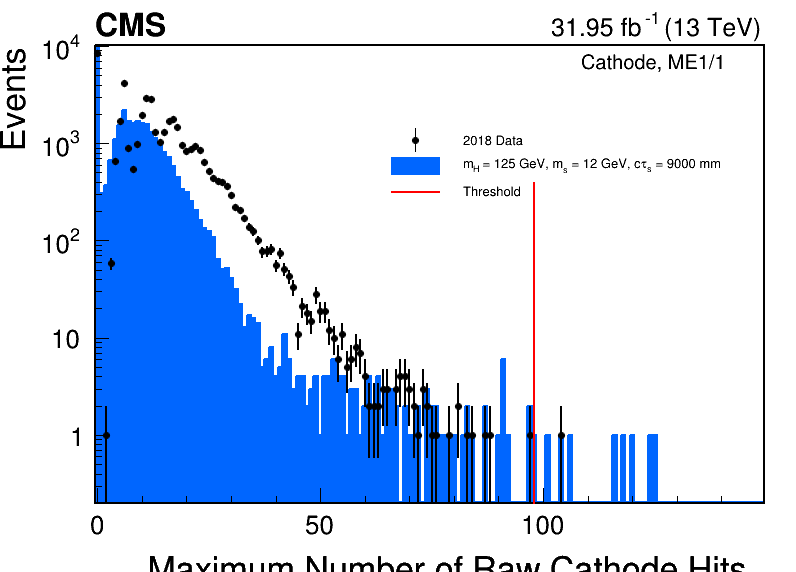

In [10]:
from IPython.display import Image
Image(filename='compplots/HTo2LongLivedTo4b_MH_125_MFF_12_CTau_9000mm/nComp_ME11.png')

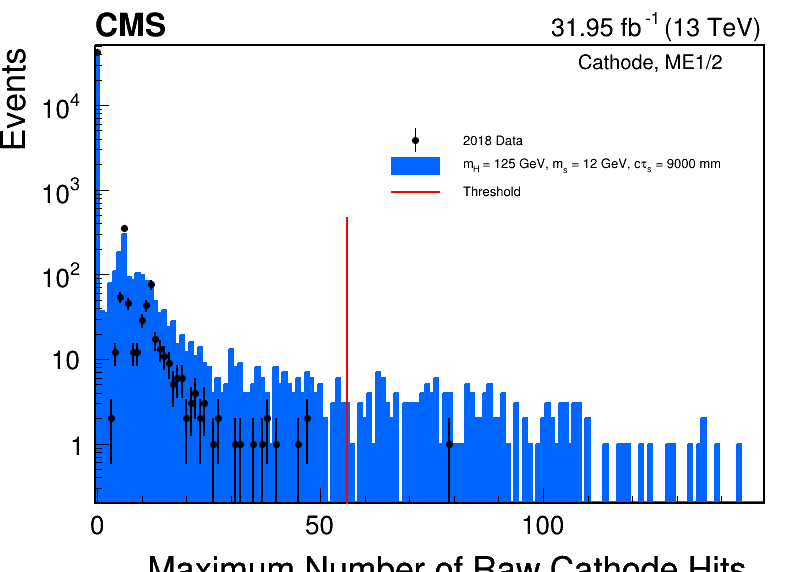

In [24]:
Image(filename='compplots/HTo2LongLivedTo4b_MH_125_MFF_12_CTau_9000mm/nComp_ME12.png')